### Name: Ankit Kumar
### Student Number: 19200191


In [172]:
import requests
import json
import pandas as pd
import csv
from pandas.io.json import json_normalize
import numpy as np
#from flatten_json import flatten

In [2]:
headers = {'X-RapidAPI-Key':'1840b93605msh33df96403a1e72cp1648b6jsn3f2c7b21d962',
 'X-RapidAPI-Host':'free-nba.p.rapidapi.com'}

In [ ]:
def create_file (file_loc, headings): 
    with open(file_loc, "w",newline='') as write_file: 
        f = csv.writer(write_file)
        f.writerow(headings)
    write_file.close()

In [ ]:
def get_and_write_data(link, file_loc): 
    response = requests.request("GET", link, headers=headers)
    data = json.loads(response.text)
    csv_data = json_normalize(data['data'])
    csv_data.to_csv(file_loc, mode='a', index=False, header=False)

In [ ]:
def get_raw_data(file_loc, page_num):
    link = "https://free-nba.p.rapidapi.com/stats?page={}".format(page_num)
    get_and_write_data(link, file_loc)

In [ ]:
headings = ['id', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct', 'fga',
       'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb', 'stl',
       'turnover', 'game.id', 'game.date', 'game.home_team_id',
       'game.home_team_score', 'game.period', 'game.postseason', 'game.season',
       'game.status', 'game.time', 'game.visitor_team_id',
       'game.visitor_team_score', 'player.id', 'player.first_name',
       'player.height_feet', 'player.height_inches', 'player.last_name',
       'player.position', 'player.team_id', 'player.weight_pounds', 'team.id',
       'team.abbreviation', 'team.city', 'team.conference', 'team.division',
       'team.full_name', 'team.name']
file_loc = "NBA_stat.csv"
create_file(file_loc,headings)
page = 100
for page_num in range(1,page):
    get_raw_data(file_loc,page_num)

In [293]:
file_loc = "NBA_stat.csv"
df_stat_all = pd.read_csv(file_loc)
df_stat_all.set_index('id',inplace = True)
#stat_df.head()
#df_stat_all.columns

### Field Info
* Points(include all points with free throw): 'pts'
* Field goal made(include all points excluding free throw): 'fgm'
* Field goal attempt(include all points excluding free throw):'fga'
* Field goal percentage:'fg_pct'
* Assist: 'ast',
* Block:'blk',
* Rebounds: 'reb',
* Three point field goals made: 'fg3m'
* Three point field goals attempted: 'fg3a'
* Three point field percentage:'fg3_pct'
* Free throw made:'ftm'
* Free throw attempt: 'fta'
* Free throw percentage: 'ft_pct'
* Steals: 'stl'
* Personal fouls: 'pf'
* Turnover: 'turnover'
* Total time: 'min' 

In [294]:
df_stat_all.shape

(2475, 45)

In [295]:
players_stat = df_stat_all[['player.id','player.first_name','player.last_name','ast','blk', 'dreb','fg3_pct', 'fg3a',
                            'fg3m','fg_pct','fga','fgm','ft_pct','fta','ftm','min','oreb','pf','pts','reb','stl','turnover',
                            'player.position','team.id','team.full_name','game.home_team_id','game.home_team_score',
                            'game.visitor_team_id','game.visitor_team_score']]

#Renaming Columns
players_stat.rename(columns={
                            'player.id':'Player_ID',
                            'player.first_name':'First_Name',
                            'player.last_name':'Last_Name',
                            'ast':'AST',
                            'blk':'BLK', 
                            'dreb':'DREB',
                            'fg3_pct':'FG3_PCT', 
                            'fg3a':'FG3A',
                            'fg3m':'FG3M',
                            'fg_pct':'FG_PCT',
                            'fga':'FGA',
                            'fgm':'FGM',
                            'ft_pct':'FT_PCT',
                            'fta':'FTA',
                            'ftm':'FTM',
                            'min':'MIN',
                            'oreb':'OREB',
                            'pf':'PF',
                            'pts':'PTS',
                            'reb':'REB',
                            'stl':'STL',
                            'turnover':'Turnover',
                            'player.position':'Player_Position',
                            'team.id':'Players_Team_ID',
                            'team.full_name':'Players_Team_Name',
                            'game.home_team_id':'Home_Team_ID',
                            'game.home_team_score':'Home_Team_Score',
                            'game.visitor_team_id':'Visitor_Team_ID',
                            'game.visitor_team_score':'Visitor_Team_Score'}, inplace=True)
# Data after renaming columns
players_stat.head()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069008,415,Iman,Shumpert,0.0,1.0,2.0,0.200,5.0,1.0,0.333,...,2.0,0.0,2.0,G,26,Sacramento Kings,4,114,26,95
1069009,49,Nemanja,Bjelica,4.0,0.0,5.0,0.000,2.0,0.0,0.200,...,6.0,0.0,0.0,F,26,Sacramento Kings,4,114,26,95
1069010,91,Willie,Cauley-Stein,4.0,1.0,5.0,0.000,0.0,0.0,0.667,...,11.0,3.0,2.0,C,26,Sacramento Kings,4,114,26,95
1069011,210,Buddy,Hield,1.0,0.0,1.0,0.545,11.0,6.0,0.500,...,1.0,2.0,0.0,G,26,Sacramento Kings,4,114,26,95
1069012,161,De'Aaron,Fox,8.0,1.0,5.0,0.000,2.0,0.0,0.400,...,5.0,1.0,4.0,G,26,Sacramento Kings,4,114,26,95


In [296]:
# Null count for each column
players_stat.isnull().sum()

Player_ID                0
First_Name               0
Last_Name                1
AST                   1774
BLK                   1774
DREB                  1774
FG3_PCT               1774
FG3A                  1774
FG3M                  1688
FG_PCT                1774
FGA                   1774
FGM                   1688
FT_PCT                1688
FTA                   1688
FTM                   1688
MIN                   1688
OREB                  1774
PF                    1771
PTS                   1688
REB                   1774
STL                   1774
Turnover              1774
Player_Position       1504
Players_Team_ID          0
Players_Team_Name        0
Home_Team_ID             0
Home_Team_Score          0
Visitor_Team_ID          0
Visitor_Team_Score       0
dtype: int64

In [297]:
# Creating a subset having only the players stat values from Assist(AST) till Position(Player_Position)
df_stats = players_stat.loc[:,'AST':'Player_Position']

# Null count for each record in the Data
stats_null_counts = df_stats.isnull().sum(axis=1)
print(stats_null_counts)

id
1069008     0
1069009     0
1069010     0
1069011     0
1069012     0
           ..
306454     20
306514     20
306645     19
306970     20
307031     20
Length: 2475, dtype: int64


In [298]:
# Finding those records that have null count more than predefined threshold.
threshold = 50
stats_null_counts = df_stats.isnull().sum(axis=1)
null_row = stats_null_counts[stats_null_counts>int(len(df_stats.columns)*(threshold/100))]
#null_row = stats_null_counts[stats_null_counts>10]

# Selected index that have null values more than threshold
null_idx = null_row.index.tolist()

# Removing all the above rows from the players_stat DataFrame
players_stat = players_stat.drop(null_idx)
players_stat

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069008,415,Iman,Shumpert,0.0,1.0,2.0,0.200,5.0,1.0,0.333,...,2.0,0.0,2.0,G,26,Sacramento Kings,4,114,26,95
1069009,49,Nemanja,Bjelica,4.0,0.0,5.0,0.000,2.0,0.0,0.200,...,6.0,0.0,0.0,F,26,Sacramento Kings,4,114,26,95
1069010,91,Willie,Cauley-Stein,4.0,1.0,5.0,0.000,0.0,0.0,0.667,...,11.0,3.0,2.0,C,26,Sacramento Kings,4,114,26,95
1069011,210,Buddy,Hield,1.0,0.0,1.0,0.545,11.0,6.0,0.500,...,1.0,2.0,0.0,G,26,Sacramento Kings,4,114,26,95
1069012,161,De'Aaron,Fox,8.0,1.0,5.0,0.000,2.0,0.0,0.400,...,5.0,1.0,4.0,G,26,Sacramento Kings,4,114,26,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069803,449,Allonzo,Trier,8.0,0.0,2.0,0.000,1.0,0.0,0.375,...,6.0,2.0,4.0,G,20,New York Knicks,20,109,21,127
1069804,399,Mitchell,Robinson,1.0,2.0,5.0,0.000,0.0,0.0,1.000,...,6.0,1.0,0.0,C,20,New York Knicks,20,109,21,127
1069805,208,Mario,Hezonja,0.0,0.0,0.0,0.000,0.0,0.0,0.400,...,2.0,0.0,2.0,F,20,New York Knicks,20,109,21,127


In [299]:
#Checking null columns counts after removing unwanted rows
players_stat.isnull().sum()

Player_ID              0
First_Name             0
Last_Name              1
AST                    0
BLK                    0
DREB                   0
FG3_PCT                0
FG3A                   0
FG3M                   0
FG_PCT                 0
FGA                    0
FGM                    0
FT_PCT                 0
FTA                    0
FTM                    0
MIN                    0
OREB                   0
PF                     0
PTS                    0
REB                    0
STL                    0
Turnover               0
Player_Position       16
Players_Team_ID        0
Players_Team_Name      0
Home_Team_ID           0
Home_Team_Score        0
Visitor_Team_ID        0
Visitor_Team_Score     0
dtype: int64

In [300]:
players_stat.describe()

,Player_ID,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,FGA,FGM,...,PF,PTS,REB,STL,Turnover,Players_Team_ID,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.00000,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,297.055635,2.273894,0.436519,3.134094,0.258200,2.918688,1.07418,0.429738,8.042796,3.721826,...,1.901569,10.116976,4.049929,0.667618,1.253923,14.980029,14.804565,112.506419,15.031384,108.683310
std,390.704647,2.420570,0.767580,2.714878,0.303653,2.858662,1.44130,0.249306,5.642279,2.981073,...,1.501527,8.093773,3.487376,0.948348,1.366331,8.684281,9.372622,12.667801,7.869408,12.211569
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,88.000000,2.000000,87.000000
25%,128.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.286000,4.000000,1.000000,...,1.000000,4.000000,1.000000,0.000000,0.000000,7.000000,6.000000,101.000000,7.000000,99.000000
50%,243.000000,2.000000,0.000000,3.000000,0.167000,2.000000,1.00000,0.444000,7.000000,3.000000,...,2.000000,8.000000,3.000000,0.000000,1.000000,15.000000,12.000000,113.000000,15.000000,109.000000
75%,363.000000,3.000000,1.000000,5.000000,0.500000,4.000000,2.00000,0.583000,12.000000,6.000000,...,3.000000,15.000000,6.000000,1.000000,2.000000,23.000000,22.000000,122.000000,22.000000,117.000000
max,3450.000000,13.000000,6.000000,14.000000,1.000000,19.000000,8.00000,1.000000,30.000000,16.000000,...,6.000000,48.000000,17.000000,5.000000,7.000000,30.000000,30.000000,138.000000,27.000000,138.000000


In [301]:
#Handling missing values in individual columns
players_stat[players_stat['Last_Name'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069579,342,Nene,NaN,3.0,0.0,4.0,0.0,0.0,0.0,0.5,...,4.0,0.0,0.0,C-F,11,Houston Rockets,11,138,14,134


In [302]:
# Handling missing last_Name by changing the value with an empty string.
players_stat['Last_Name'] = players_stat['Last_Name'].fillna(value=' ')
#Checking after replacing null value.
players_stat[players_stat['Last_Name'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,


In [303]:
# Handling Player_Position Value
players_stat[players_stat['Player_Position'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,
1069043,2020,Quincy,Acy,0.0,1.0,0.0,0.0,1.0,0.0,0.000,...,0.0,0.0,0.0,NaN,24,Phoenix Suns,28,111,24,109
1069056,2158,Patrick,McCaw,0.0,0.0,1.0,0.0,1.0,0.0,0.000,...,1.0,0.0,1.0,NaN,28,Toronto Raptors,28,111,24,109
1069131,3091,Brandon,Goodwin,1.0,0.0,0.0,0.0,1.0,0.0,0.000,...,0.0,0.0,0.0,NaN,8,Denver Nuggets,8,135,5,105
1069165,3090,Jaron,Blossomgame,0.0,0.0,4.0,0.0,0.0,0.0,1.000,...,5.0,0.0,0.0,NaN,6,Cleveland Cavaliers,29,115,6,99
1069277,3089,Gary,Trent Jr.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,NaN,25,Portland Trail Blazers,25,128,19,112
1069315,1771,Joakim,Noah,2.0,0.0,4.0,0.0,0.0,0.0,0.000,...,5.0,3.0,1.0,NaN,15,Memphis Grizzlies,2,122,15,116
1069360,3090,Jaron,Blossomgame,2.0,0.0,1.0,0.0,1.0,0.0,0.333,...,1.0,1.0,1.0,NaN,6,Cleveland Cavaliers,8,124,6,102
1069365,3450,Deng,Adel,0.0,0.0,1.0,1.0,1.0,1.0,1.000,...,2.0,0.0,0.0,NaN,6,Cleveland Cavaliers,8,124,6,102
1069377,3091,Brandon,Goodwin,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,NaN,8,Denver Nuggets,8,124,6,102


In [304]:
# Handling missing Player_Position by forward padding.
players_stat['Player_Position'] = players_stat['Player_Position'].fillna(method='ffill')
#Checking after replacing null value.
players_stat[players_stat['Player_Position'].isnull()]

,Player_ID,First_Name,Last_Name,AST,BLK,DREB,FG3_PCT,FG3A,FG3M,FG_PCT,...,REB,STL,Turnover,Player_Position,Players_Team_ID,Players_Team_Name,Home_Team_ID,Home_Team_Score,Visitor_Team_ID,Visitor_Team_Score
id,,,,,,,,,,,,,,,,,,,,,


In [305]:
players_stat.isnull().sum()

Player_ID             0
First_Name            0
Last_Name             0
AST                   0
BLK                   0
DREB                  0
FG3_PCT               0
FG3A                  0
FG3M                  0
FG_PCT                0
FGA                   0
FGM                   0
FT_PCT                0
FTA                   0
FTM                   0
MIN                   0
OREB                  0
PF                    0
PTS                   0
REB                   0
STL                   0
Turnover              0
Player_Position       0
Players_Team_ID       0
Players_Team_Name     0
Home_Team_ID          0
Home_Team_Score       0
Visitor_Team_ID       0
Visitor_Team_Score    0
dtype: int64

In [306]:
players_stat.to_csv('Cleaned_stat.csv')

In [317]:
#Creating Calculated columns Efficiency_Rating & True_Shooting_Percentage.
# Efficiency_Rating: It is intended to give a “total perspective” on a player’s statistical performance in a basketball game, taking into account every statistic listed on a player’s box score.
# True Shooting Percentage: It takes into account the difference in point value (and difficulty) of 3 pointers and free throws from 2 point field goals. It can go above 100% as well
for idx in players_stat.index:
    eff_rat = players_stat.loc[idx,'PTS'] + players_stat.loc[idx,'REB'] + players_stat.loc[idx,'AST'] + players_stat.loc[idx,'STL'] + players_stat.loc[idx,'BLK'] -((players_stat.loc[idx,'FGA'] - players_stat.loc[idx,'FGM'])+(players_stat.loc[idx,'FTA'] - players_stat.loc[idx,'FTM']) +players_stat.loc[idx,'Turnover'])
    fga_fta = ((2 * players_stat.loc[idx,'FGA']) + (0.88 * players_stat.loc[idx,'FTA']))
    #Avoiding divide by zero.
    true_shooting_perc = players_stat.loc[idx,'PTS'] / fga_fta if fga_fta != 0 else 0
    players_stat.loc[idx,'Efficiency_Rating'] = eff_rat
    players_stat.loc[idx,'True_Shooting_Percentage'] = true_shooting_perc

In [318]:
players_stat.isnull().sum()

Player_ID                   0
First_Name                  0
Last_Name                   0
AST                         0
BLK                         0
DREB                        0
FG3_PCT                     0
FG3A                        0
FG3M                        0
FG_PCT                      0
FGA                         0
FGM                         0
FT_PCT                      0
FTA                         0
FTM                         0
MIN                         0
OREB                        0
PF                          0
PTS                         0
REB                         0
STL                         0
Turnover                    0
Player_Position             0
Players_Team_ID             0
Players_Team_Name           0
Home_Team_ID                0
Home_Team_Score             0
Visitor_Team_ID             0
Visitor_Team_Score          0
Efficiency_Rating           0
True_Shooting_Percentage    0
dtype: int64

In [319]:
df_eff_rat = players_stat[['First_Name','Efficiency_Rating','Players_Team_Name']]
df_eff_rat.sort_values(by = 'Efficiency_Rating',ascending=False, inplace=True)
#df_eff_rat.drop(df_eff_rat.index, axis=0)
df_eff_rat = df_eff_rat.set_index('First_Name')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [320]:
df_eff_rat

,Efficiency_Rating,Players_Team_Name
First_Name,,
Kyrie,44.0,Boston Celtics
James,42.0,Houston Rockets
D'Angelo,40.0,Brooklyn Nets
Tobias,39.0,LA Clippers
Rudy,38.0,Utah Jazz
...,...,...
Brandon,-3.0,Denver Nuggets
Harrison,-3.0,Dallas Mavericks
Iman,-3.0,Sacramento Kings


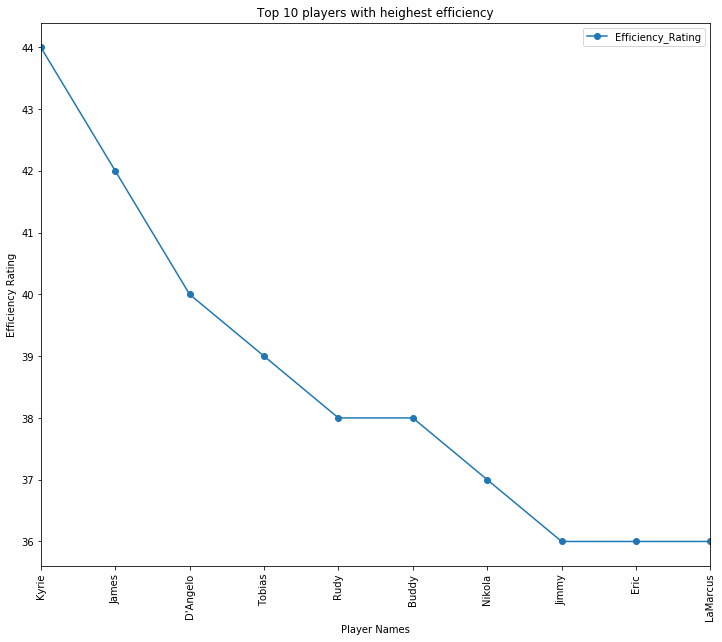

In [321]:
#Plotting top 10 players with heighest efficiency
import matplotlib.pyplot as plt
#plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
df_eff_rat.iloc[0:10,:].plot(figsize=(12, 10), marker = 'o')
#df_eff_rat.plot(figsize=(10, 8))
plt.title('Top 10 players with heighest efficiency')
plt.xlabel('Player Names')
plt.ylabel('Efficiency Rating')
plt.xticks(rotation=90)
plt.show()

In [322]:
#Average Efficiency Rating Team-wise
groupby_Team_df = df_eff_rat.groupby('Players_Team_Name')
teams = groupby_Team_df.groups.keys()

team_avg_efficiency = {}
for team in teams:
    mean_ = temp_df.get_group(team)['Efficiency_Rating'].mean()
    team_avg_efficiency[team] = mean_
    
#Converting a list of tuples for easy processing
team_avg_efficiency =  team_avg_efficiency.items()

#Creating Dataframe for easy visualization
team_avg_efficiency = pd.DataFrame({'Team_Name': [i[0] for i in team_avg_efficiency],'Average_Efficiency':[i[1] for i in team_avg_efficiency]})
team_avg_efficiency = team_avg_efficiency.set_index('Team_Name')
len(team_avg_efficiency)

30

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

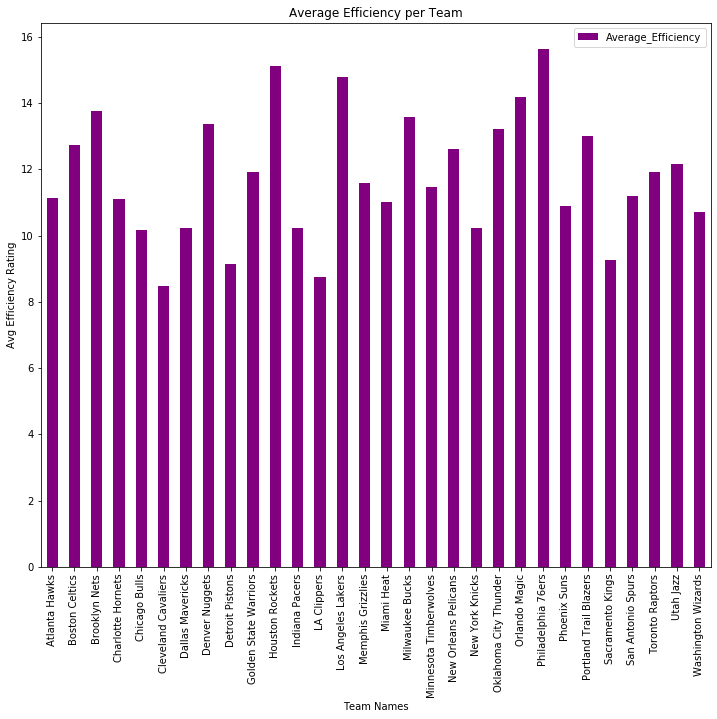

In [323]:
#Visualising average efficiency.
#plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
team_avg_efficiency.plot(kind='bar',figsize=(12, 10), legend=True, color='purple')
plt.title('Average Efficiency per Team')
plt.xlabel('Team Names')
plt.ylabel('Avg Efficiency Rating')
plt.xticks(rotation=90)

In [324]:
#True Shooting Percentage of each player
df_shoot_perc = players_stat[['First_Name','True_Shooting_Percentage','Players_Team_Name']]
df_shoot_perc.sort_values(by = 'True_Shooting_Percentage',ascending=False, inplace=True)
#df_eff_rat.drop(df_eff_rat.index, axis=0)
df_shoot_perc = df_shoot_perc.set_index('First_Name')
df_shoot_perc

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,True_Shooting_Percentage,Players_Team_Name
First_Name,,
De'Anthony,1.5,Phoenix Suns
Landry,1.5,Philadelphia 76ers
Devonte',1.5,Charlotte Hornets
Ersan,1.5,Milwaukee Bucks
Deng,1.5,Cleveland Cavaliers
...,...,...
Guerschon,0.0,Boston Celtics
Daniel,0.0,Boston Celtics
Patrick,0.0,Oklahoma City Thunder


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text xticklabel objects>)

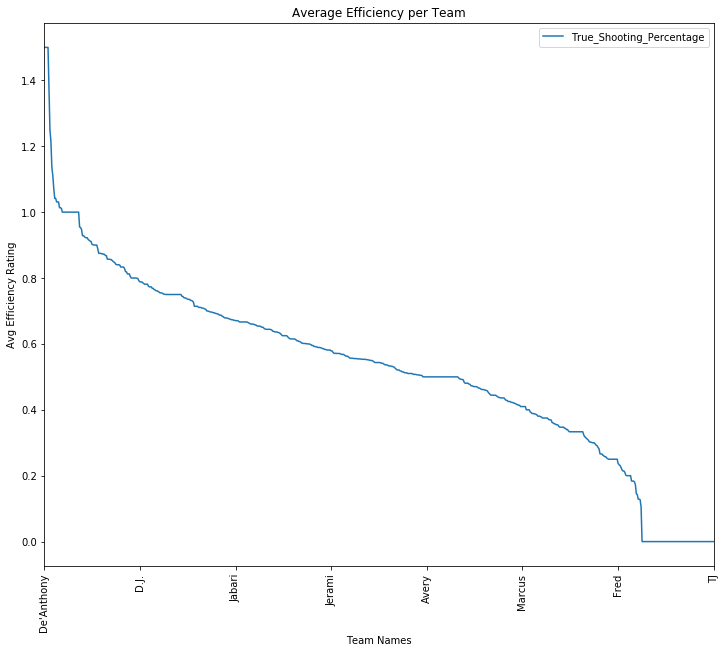

In [326]:
#df_shoot_perc.plot(figsize=(12, 10), legend=True)
plt.scatter(df)
plt.title('Average Efficiency per Team')
plt.xlabel('Team Names')
plt.ylabel('Avg Efficiency Rating')
plt.xticks(rotation=90)